# Instalando librerias necesarias

In [1]:
import sys
!{sys.executable} -m pip install pytz

In [2]:
! pip install pygeohash

In [3]:
! pip install descartes

In [4]:
! pip install matplotlib

# Importando librerias necesarias

In [5]:
import pandas as pd
import numpy as np
import pygeohash as gh
import glob
import os
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt

# Paths

In [6]:
ruta_actual = os.path.abspath(os.curdir)
print(ruta_actual)

C:\Users\Admin\Documents\Github\Geohashes-Colegios\Codes\Python\Analisis colegios


In [7]:
#path_personal = r"C:\Users\BS\Documents\Github"
path_personal = r"C:\Users\Admin\Documents\Github"

path_global = path_personal + r"\Geohashes-Colegios"

path_data = path_global + r"\Data"

path_data_colegios = path_data + r"\Colegios"
#file_colegios = path_data_colegios + r"\Chile_colegios_original.csv"
file_colegios = path_data_colegios + r"\Chile_colegios_original_new.dta"

path_shapes = path_data + r"\Shapes"
file_shape = path_shapes + r"\Chile\comunas.shp"

path_output = path_data_colegios
file_output = path_data_colegios + r"\Chile_colegios_original_new_geohash.csv"

print(file_colegios)
print(file_shape)
print(file_output)

C:\Users\Admin\Documents\Github\Geohashes-Colegios\Data\Colegios\Chile_colegios_original_new.dta
C:\Users\Admin\Documents\Github\Geohashes-Colegios\Data\Shapes\Chile\comunas.shp
C:\Users\Admin\Documents\Github\Geohashes-Colegios\Data\Colegios\Chile_colegios_original_new_geohash.csv


# Agregando geohash a colegios georreferenciados (puntos)

#### Identificadores - Cambiar para cada país

In [8]:
# Coordenadas geograficas
LATITUD = 'latitud'
LONGITUD = 'longitud'

In [9]:
# Identificadores de colegios
COD_Interes = 'rbd'

In [10]:
# Identificadores de regiones
ID_regeion = 'cod_comuna'
Nom_region = 'Comuna'

#### Importando archivo de colegios

In [11]:
# df = pd.read_csv(file_colegios, sep = ';')
df = pd.read_stata(file_colegios)

In [12]:
df.shape

(16236, 68)

In [13]:
df.head(5)

,AGNO,rbd,dgv_rbd,nom_rbd,mrun,rut_sostenedor,p_juridica,cod_reg_rbd,nom_reg_rbd_a,cod_pro_rbd,...,Matr_Palv,Matr_Bas_NinJov,Matr_Bas_Adu,Matr_Med_NinJov,Matr_Med_Adu,Matr_Tec_NinJov,Matr_Tec_Adu,Mat_total,Matr_Espec,Mat_terc_col
0,2019,1,9,LICEO POLITECNICO ARICA,,69010100,1,15,AYP,151,...,0.0,0.0,0.0,0.0,0.0,378.0,288.0,666.0,0.0,3.0
1,2019,2,7,PARVULARIO LAS ESPIGUITAS,,69010100,1,15,AYP,151,...,211.0,0.0,0.0,0.0,0.0,0.0,0.0,211.0,0.0,2.0
2,2019,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,,69010100,1,15,AYP,151,...,0.0,0.0,407.0,0.0,5.0,0.0,0.0,412.0,0.0,3.0
3,2019,4,3,LICEO OCTAVIO PALMA PEREZ,,69010100,1,15,AYP,151,...,0.0,0.0,0.0,977.0,0.0,0.0,0.0,977.0,0.0,3.0
4,2019,5,1,JOVINA NARANJO FERNANDEZ,,69010100,1,15,AYP,151,...,0.0,270.0,0.0,550.0,172.0,0.0,0.0,992.0,0.0,3.0


In [14]:
df.columns

Index(['AGNO', 'rbd', 'dgv_rbd', 'nom_rbd', 'mrun', 'rut_sostenedor',
       'p_juridica', 'cod_reg_rbd', 'nom_reg_rbd_a', 'cod_pro_rbd',
       'cod_com_rbd', 'nom_com_rbd', 'cod_deprov_rbd', 'nom_deprov_rbd',
       'cod_depe', 'cod_depe2', 'rural_rbd', 'latitud', 'longitud',
       'convenio_pie', 'ens_01', 'ens_02', 'ens_03', 'ens_04', 'ens_05',
       'ens_06', 'ens_07', 'ens_08', 'ens_09', 'ens_10', 'ens_11', 'matricula',
       'estado_estab', 'ori_religiosa', 'ori_otro_glosa', 'pago_matricula',
       'pago_mensual', 'Asist_nom_rbd', 'Asist_cod_com_rbd', 'dias_asistidos',
       'dias_trabajados', 'Asist_total', 'Asist_Palv', 'Asist_Bas_NinJov',
       'Asist_Bas_Adu', 'Asist_Espec', 'Asist_Med_NinJov', 'Asist_Med_Adu',
       'Asist_Tec_NinJov', 'Asist_Tec_Adu', 'Asist_terc_col', 'Matr_nom_rbd',
       'Matr_cod_depe', 'Matr_cod_depe2', 'Matr_rural_rbd', 'Matr_cod_reg_rbd',
       'Matr_cod_com_rbd', 'Matr_estado_estab', 'Matr_Palv', 'Matr_Bas_NinJov',
       'Matr_Bas_Adu', '

#### Limpieza de colegios sin coordenadas

In [15]:
def clean_lat_long(x):
    x = x.replace(',','.').replace(' ','')
    if len(x) == 0:
        return np.nan
    return float(x)
df['lat'] = df[LATITUD].apply(clean_lat_long)
df['long'] = df[LONGITUD].apply(clean_lat_long)

In [16]:
df = df.drop(columns = [LATITUD, LONGITUD])

In [17]:
df[COD_Interes].unique()

array([    1,     2,     3, ..., 41375, 41376, 41377])

In [18]:
df.shape

(16236, 68)

#### Agregando geohash a coordenadas de colegios

In [19]:
df['geohash'] = df.apply(lambda x: 
                         gh.encode(x.lat, x.long, precision = 7), axis = 1)

In [20]:
df.shape

(16236, 69)

In [21]:
df.head()

,AGNO,rbd,dgv_rbd,nom_rbd,mrun,rut_sostenedor,p_juridica,cod_reg_rbd,nom_reg_rbd_a,cod_pro_rbd,...,Matr_Med_NinJov,Matr_Med_Adu,Matr_Tec_NinJov,Matr_Tec_Adu,Mat_total,Matr_Espec,Mat_terc_col,lat,long,geohash
0,2019,1,9,LICEO POLITECNICO ARICA,,69010100,1,15,AYP,151,...,0.0,0.0,378.0,288.0,666.0,0.0,3.0,-18.487274,-70.294739,6kwnb6k
1,2019,2,7,PARVULARIO LAS ESPIGUITAS,,69010100,1,15,AYP,151,...,0.0,0.0,0.0,0.0,211.0,0.0,2.0,-18.469862,-70.302757,6kwnbjx
2,2019,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,,69010100,1,15,AYP,151,...,0.0,5.0,0.0,0.0,412.0,0.0,3.0,-18.503580,-70.260826,6kwn9pt
3,2019,4,3,LICEO OCTAVIO PALMA PEREZ,,69010100,1,15,AYP,151,...,977.0,0.0,0.0,0.0,977.0,0.0,3.0,-18.474243,-70.308266,6kwnbhg
4,2019,5,1,JOVINA NARANJO FERNANDEZ,,69010100,1,15,AYP,151,...,550.0,172.0,0.0,0.0,992.0,0.0,3.0,-18.476904,-70.313454,6ktyzur


In [22]:
df.columns

Index(['AGNO', 'rbd', 'dgv_rbd', 'nom_rbd', 'mrun', 'rut_sostenedor',
       'p_juridica', 'cod_reg_rbd', 'nom_reg_rbd_a', 'cod_pro_rbd',
       'cod_com_rbd', 'nom_com_rbd', 'cod_deprov_rbd', 'nom_deprov_rbd',
       'cod_depe', 'cod_depe2', 'rural_rbd', 'convenio_pie', 'ens_01',
       'ens_02', 'ens_03', 'ens_04', 'ens_05', 'ens_06', 'ens_07', 'ens_08',
       'ens_09', 'ens_10', 'ens_11', 'matricula', 'estado_estab',
       'ori_religiosa', 'ori_otro_glosa', 'pago_matricula', 'pago_mensual',
       'Asist_nom_rbd', 'Asist_cod_com_rbd', 'dias_asistidos',
       'dias_trabajados', 'Asist_total', 'Asist_Palv', 'Asist_Bas_NinJov',
       'Asist_Bas_Adu', 'Asist_Espec', 'Asist_Med_NinJov', 'Asist_Med_Adu',
       'Asist_Tec_NinJov', 'Asist_Tec_Adu', 'Asist_terc_col', 'Matr_nom_rbd',
       'Matr_cod_depe', 'Matr_cod_depe2', 'Matr_rural_rbd', 'Matr_cod_reg_rbd',
       'Matr_cod_com_rbd', 'Matr_estado_estab', 'Matr_Palv', 'Matr_Bas_NinJov',
       'Matr_Bas_Adu', 'Matr_Med_NinJov', 'Matr

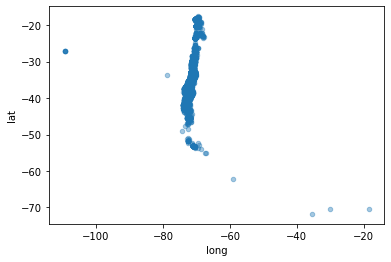

In [23]:
df.plot(kind = "scatter", x = "long", y = "lat", alpha = 0.4)
plt.show()

#### Transformando puntos a shape

Transformando puntos a shape

In [24]:
gdf_puntos = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.long, df.lat), 
                             crs = 'epsg:4326')

In [25]:
gdf_puntos.shape

(16236, 70)

In [26]:
gdf_puntos = gdf_puntos.dropna(subset = ['geohash', 'long', 'lat'])

In [27]:
gdf_puntos.shape

(12937, 70)

In [28]:
gdf_puntos.head()

,AGNO,rbd,dgv_rbd,nom_rbd,mrun,rut_sostenedor,p_juridica,cod_reg_rbd,nom_reg_rbd_a,cod_pro_rbd,...,Matr_Med_Adu,Matr_Tec_NinJov,Matr_Tec_Adu,Mat_total,Matr_Espec,Mat_terc_col,lat,long,geohash,geometry
0,2019,1,9,LICEO POLITECNICO ARICA,,69010100,1,15,AYP,151,...,0.0,378.0,288.0,666.0,0.0,3.0,-18.487274,-70.294739,6kwnb6k,POINT (-70.29474 -18.48727)
1,2019,2,7,PARVULARIO LAS ESPIGUITAS,,69010100,1,15,AYP,151,...,0.0,0.0,0.0,211.0,0.0,2.0,-18.469862,-70.302757,6kwnbjx,POINT (-70.30276 -18.46986)
2,2019,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,,69010100,1,15,AYP,151,...,5.0,0.0,0.0,412.0,0.0,3.0,-18.503580,-70.260826,6kwn9pt,POINT (-70.26083 -18.50358)
3,2019,4,3,LICEO OCTAVIO PALMA PEREZ,,69010100,1,15,AYP,151,...,0.0,0.0,0.0,977.0,0.0,3.0,-18.474243,-70.308266,6kwnbhg,POINT (-70.30827 -18.47424)
4,2019,5,1,JOVINA NARANJO FERNANDEZ,,69010100,1,15,AYP,151,...,172.0,0.0,0.0,992.0,0.0,3.0,-18.476904,-70.313454,6ktyzur,POINT (-70.31345 -18.47690)


Graficando shapefiles generado (puntos)

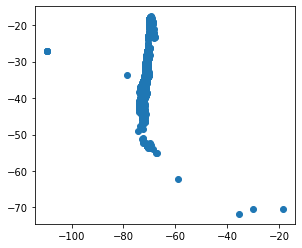

In [29]:
gdf_puntos.plot()

#### Agrega regiones a geohashes de colegios

Cargando shapefile de regiones

In [30]:
mapa = gpd.read_file(file_shape)
mapa = mapa.to_crs("epsg:4326")

In [31]:
mapa.head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-71.80071 -34.20728, -71.79992 -34.2..."
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-70.35293 -33.95263, -70.35243 -33.9..."
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Coinco,Cachapoal,"POLYGON ((-70.90058 -34.23703, -70.90063 -34.2..."
3,31,89840.903562,15,8,6104,6,3.256572e+08,108874.623150,Región del Libertador Bernardo O'Higgins,Coltauco,Cachapoal,"POLYGON ((-71.02492 -34.17053, -71.02320 -34.1..."
4,78,122626.493264,23,11,9121,9,6.990727e+08,156680.410681,Región de La Araucanía,Cholchol,Cautín,"POLYGON ((-72.95898 -38.46877, -72.95797 -38.4..."


Dibujando shapefile de regiones

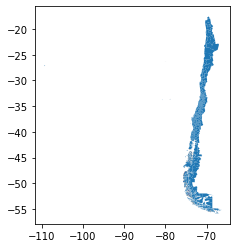

In [32]:
mapa.plot()

Cruzando shapefiles - Puntos y Polígonos

In [33]:
mapa = mapa.loc[:, [ID_regeion, Nom_region, 'geometry']]
mapa.head()

,cod_comuna,Comuna,geometry
0,6204,Marchigüe,"POLYGON ((-71.80071 -34.20728, -71.79992 -34.2..."
1,6102,Codegua,"POLYGON ((-70.35293 -33.95263, -70.35243 -33.9..."
2,6103,Coinco,"POLYGON ((-70.90058 -34.23703, -70.90063 -34.2..."
3,6104,Coltauco,"POLYGON ((-71.02492 -34.17053, -71.02320 -34.1..."
4,9121,Cholchol,"POLYGON ((-72.95898 -38.46877, -72.95797 -38.4..."


In [34]:
df_final = gpd.sjoin(gdf_puntos, mapa, op ='within')

In [35]:
df_final = df_final.drop(columns = ['index_right'])

In [36]:
gdf_puntos.shape

(12937, 70)

In [37]:
df_final.shape

(12917, 72)

In [38]:
df_final.head()

,AGNO,rbd,dgv_rbd,nom_rbd,mrun,rut_sostenedor,p_juridica,cod_reg_rbd,nom_reg_rbd_a,cod_pro_rbd,...,Matr_Tec_Adu,Mat_total,Matr_Espec,Mat_terc_col,lat,long,geohash,geometry,cod_comuna,Comuna
0,2019,1,9,LICEO POLITECNICO ARICA,,69010100,1,15,AYP,151,...,288.0,666.0,0.0,3.0,-18.487274,-70.294739,6kwnb6k,POINT (-70.29474 -18.48727),15101,Arica
1,2019,2,7,PARVULARIO LAS ESPIGUITAS,,69010100,1,15,AYP,151,...,0.0,211.0,0.0,2.0,-18.469862,-70.302757,6kwnbjx,POINT (-70.30276 -18.46986),15101,Arica
2,2019,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,,69010100,1,15,AYP,151,...,0.0,412.0,0.0,3.0,-18.503580,-70.260826,6kwn9pt,POINT (-70.26083 -18.50358),15101,Arica
3,2019,4,3,LICEO OCTAVIO PALMA PEREZ,,69010100,1,15,AYP,151,...,0.0,977.0,0.0,3.0,-18.474243,-70.308266,6kwnbhg,POINT (-70.30827 -18.47424),15101,Arica
4,2019,5,1,JOVINA NARANJO FERNANDEZ,,69010100,1,15,AYP,151,...,0.0,992.0,0.0,3.0,-18.476904,-70.313454,6ktyzur,POINT (-70.31345 -18.47690),15101,Arica


# Exportando resultados

In [39]:
df_final.to_csv(file_output, sep = ',', index_label = 'row_number')

In [40]:
df.columns

Index(['AGNO', 'rbd', 'dgv_rbd', 'nom_rbd', 'mrun', 'rut_sostenedor',
       'p_juridica', 'cod_reg_rbd', 'nom_reg_rbd_a', 'cod_pro_rbd',
       'cod_com_rbd', 'nom_com_rbd', 'cod_deprov_rbd', 'nom_deprov_rbd',
       'cod_depe', 'cod_depe2', 'rural_rbd', 'convenio_pie', 'ens_01',
       'ens_02', 'ens_03', 'ens_04', 'ens_05', 'ens_06', 'ens_07', 'ens_08',
       'ens_09', 'ens_10', 'ens_11', 'matricula', 'estado_estab',
       'ori_religiosa', 'ori_otro_glosa', 'pago_matricula', 'pago_mensual',
       'Asist_nom_rbd', 'Asist_cod_com_rbd', 'dias_asistidos',
       'dias_trabajados', 'Asist_total', 'Asist_Palv', 'Asist_Bas_NinJov',
       'Asist_Bas_Adu', 'Asist_Espec', 'Asist_Med_NinJov', 'Asist_Med_Adu',
       'Asist_Tec_NinJov', 'Asist_Tec_Adu', 'Asist_terc_col', 'Matr_nom_rbd',
       'Matr_cod_depe', 'Matr_cod_depe2', 'Matr_rural_rbd', 'Matr_cod_reg_rbd',
       'Matr_cod_com_rbd', 'Matr_estado_estab', 'Matr_Palv', 'Matr_Bas_NinJov',
       'Matr_Bas_Adu', 'Matr_Med_NinJov', 'Matr